In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
skirts = pd.read_csv('skirts.csv', index_col=[1], parse_dates=True)
skirts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 1866-01-01 to 1911-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   obsno   46 non-null     int64
 1   diam    46 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [3]:
skirts = skirts.drop('obsno', axis=1)
skirts.head()

,diam
year,
1866-01-01,608
1867-01-01,617
1868-01-01,625
1869-01-01,636
1870-01-01,657


In [4]:
skirts.tail()
skirts.describe()

,diam
count,46.000000
mean,759.260870
std,179.202856
min,523.000000
25%,593.000000
50%,765.000000
75%,909.750000
max,1049.000000


Text(0.5, 1.0, 'Data = Skirts')

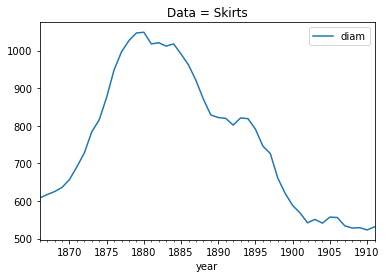

In [5]:
#Lineplot
skirts.plot()
plt.title('Data = Skirts')


Text(0.5, 1.0, 'Histogram of Skirts Data')

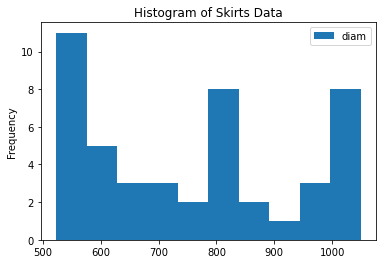

In [6]:
#Histogram
skirts.plot(kind='hist')
plt.title('Histogram of Skirts Data')

Text(0.5, 1.0, 'Density plot of skirts Data')

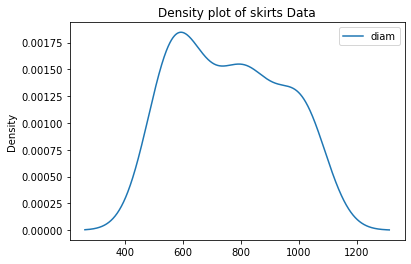

In [7]:
#Density plot
skirts.plot(kind='kde')
plt.title('Density plot of skirts Data')


Text(0.5, 1.0, 'Boxplot of Skirts Data')

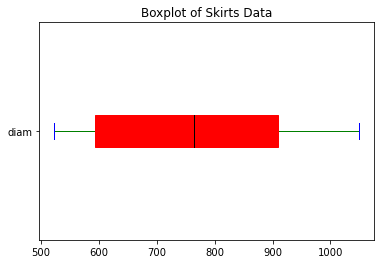

In [8]:
#Boxplot
props2 = dict(boxes = 'red', whiskers ='green', medians = 'black', caps = 'blue')
skirts.plot.box(color = props2 , patch_artist = True, vert = False)
plt.title('Boxplot of Skirts Data')


year
1866-01-01    1.0
1867-01-01    1.0
1868-01-01    1.0
1869-01-01    1.0
1870-01-01    1.0
1871-01-01    1.0
1872-01-01    1.0
1873-01-01    1.0
1874-01-01    1.0
1875-01-01    1.0
1876-01-01    1.0
1877-01-01    1.0
1878-01-01    1.0
1879-01-01    1.0
1880-01-01    1.0
1881-01-01    1.0
1882-01-01    1.0
1883-01-01    1.0
1884-01-01    1.0
1885-01-01    1.0
1886-01-01    1.0
1887-01-01    1.0
1888-01-01    1.0
1889-01-01    1.0
1890-01-01    1.0
1891-01-01    1.0
1892-01-01    1.0
1893-01-01    1.0
1894-01-01    1.0
1895-01-01    1.0
1896-01-01    1.0
1897-01-01    1.0
1898-01-01    1.0
1899-01-01    1.0
1900-01-01    1.0
1901-01-01    1.0
1902-01-01    1.0
1903-01-01    1.0
1904-01-01    1.0
1905-01-01    1.0
1906-01-01    1.0
1907-01-01    1.0
1908-01-01    1.0
1909-01-01    1.0
1910-01-01    1.0
1911-01-01    1.0
Name: resid, dtype: float64

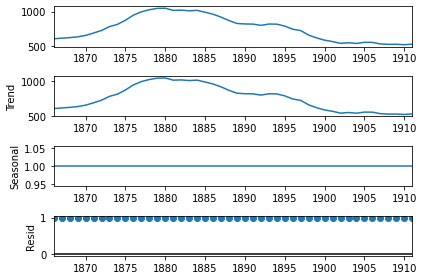

In [9]:
#Decompose with multiplicative model
from statsmodels.tsa.seasonal import seasonal_decompose
skirts_decomp_m = seasonal_decompose(skirts, model='mul')
skirts_decomp_m.plot() #No Trend & no seasonality
skirts_decomp_m.observed
skirts_decomp_m.trend
skirts_decomp_m.seasonal
skirts_decomp_m.resid

year
1866-01-01    0.0
1867-01-01    0.0
1868-01-01    0.0
1869-01-01    0.0
1870-01-01    0.0
1871-01-01    0.0
1872-01-01    0.0
1873-01-01    0.0
1874-01-01    0.0
1875-01-01    0.0
1876-01-01    0.0
1877-01-01    0.0
1878-01-01    0.0
1879-01-01    0.0
1880-01-01    0.0
1881-01-01    0.0
1882-01-01    0.0
1883-01-01    0.0
1884-01-01    0.0
1885-01-01    0.0
1886-01-01    0.0
1887-01-01    0.0
1888-01-01    0.0
1889-01-01    0.0
1890-01-01    0.0
1891-01-01    0.0
1892-01-01    0.0
1893-01-01    0.0
1894-01-01    0.0
1895-01-01    0.0
1896-01-01    0.0
1897-01-01    0.0
1898-01-01    0.0
1899-01-01    0.0
1900-01-01    0.0
1901-01-01    0.0
1902-01-01    0.0
1903-01-01    0.0
1904-01-01    0.0
1905-01-01    0.0
1906-01-01    0.0
1907-01-01    0.0
1908-01-01    0.0
1909-01-01    0.0
1910-01-01    0.0
1911-01-01    0.0
Name: resid, dtype: float64

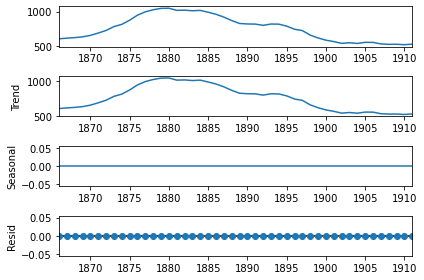

In [10]:
#Decompose with additive model
from statsmodels.tsa.seasonal import seasonal_decompose
skirts_decomp_a = seasonal_decompose(skirts, model='add')
skirts_decomp_a.plot() #No Trend & no seasonality
skirts_decomp_a.observed
skirts_decomp_a.trend
skirts_decomp_a.seasonal
skirts_decomp_a.resid

In [11]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
skirts_adf = adfuller(skirts)


In [12]:
print('ADF Statistic: %f' % skirts_adf[0])
print('p-value: %f' % skirts_adf[1])
print('Critical Values:')
for key, value in skirts_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.917555
p-value: 0.323848
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


In [13]:
#p-value: 0.323848 ie > 0.5, Null Hypothesis accepted, Data is not stationary
#H0: Data is not stationary


In [14]:
'''When data is not stationary, apply differencing and check for stationarity'''

'When data is not stationary, apply differencing and check for stationarity'

In [15]:
#Differencing @1
skirts_diff1 = skirts.diff() #default 1
skirts_diff1.head()
skirts_diff1 = skirts_diff1.dropna()
skirts_diff1


,diam
year,
1867-01-01,9.0
1868-01-01,8.0
1869-01-01,11.0
1870-01-01,21.0
1871-01-01,34.0
1872-01-01,37.0
1873-01-01,56.0
1874-01-01,32.0
1875-01-01,60.0


Text(0.5, 1.0, 'Data = Skirts@Diff_1')

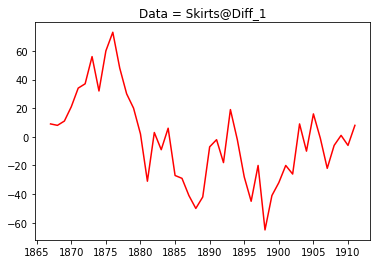

In [16]:
#Lineplot
plt.plot(skirts_diff1, 'r')
plt.title('Data = Skirts@Diff_1')

Text(0.5, 1.0, 'Histogram of Skirts@Diff_1')

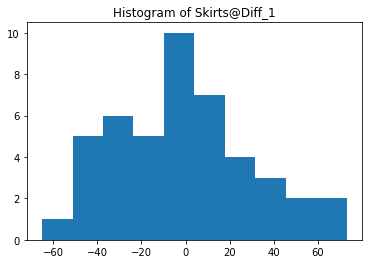

In [17]:
#Histogram
plt.hist(skirts_diff1)
plt.title('Histogram of Skirts@Diff_1')


Text(0.5, 1.0, 'Density plot of skirts Data')

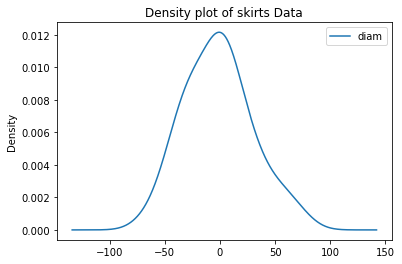

In [18]:
#Density plot
skirts_diff1.plot(kind='kde')
plt.title('Density plot of skirts Data')

year
1867-01-01    0.0
1868-01-01    0.0
1869-01-01    0.0
1870-01-01    0.0
1871-01-01    0.0
1872-01-01    0.0
1873-01-01    0.0
1874-01-01    0.0
1875-01-01    0.0
1876-01-01    0.0
1877-01-01    0.0
1878-01-01    0.0
1879-01-01    0.0
1880-01-01    0.0
1881-01-01    0.0
1882-01-01    0.0
1883-01-01    0.0
1884-01-01    0.0
1885-01-01    0.0
1886-01-01    0.0
1887-01-01    0.0
1888-01-01    0.0
1889-01-01    0.0
1890-01-01    0.0
1891-01-01    0.0
1892-01-01    0.0
1893-01-01    0.0
1894-01-01    0.0
1895-01-01    0.0
1896-01-01    0.0
1897-01-01    0.0
1898-01-01    0.0
1899-01-01    0.0
1900-01-01    0.0
1901-01-01    0.0
1902-01-01    0.0
1903-01-01    0.0
1904-01-01    0.0
1905-01-01    0.0
1906-01-01    0.0
1907-01-01    0.0
1908-01-01    0.0
1909-01-01    0.0
1910-01-01    0.0
1911-01-01    0.0
Name: resid, dtype: float64

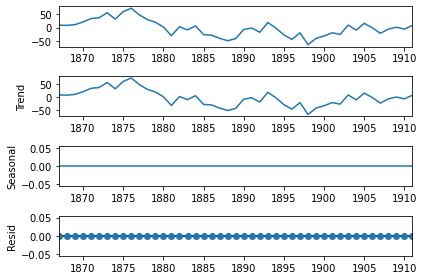

In [19]:
#Decompose with Additive model
#Multiplicative seasonality is not appropriate for zero and negative values
#So model multiplicative is not applicable
from statsmodels.tsa.seasonal import seasonal_decompose
skirts_diff1_decomp_a = seasonal_decompose(skirts_diff1, model='add')
skirts_diff1_decomp_a.plot() #No Trend & no seasonality
skirts_diff1_decomp_a.observed
skirts_diff1_decomp_a.trend
skirts_diff1_decomp_a.seasonal
skirts_diff1_decomp_a.resid

In [20]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
skirts_diff1_adf = adfuller(skirts_diff1)

In [21]:
print('ADF Statistic: %f' % skirts_diff1_adf[0])
print('p-value: %f' % skirts_diff1_adf[1])
print('Critical Values:')
for key, value in skirts_diff1_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.520768
p-value: 0.110503
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [22]:
#p-value: 0.110503 ie > 0.5, Null Hypothesis accepted, Data is not stationary
#H0: Data is not stationary


In [23]:
#Differencing @2
skirts_diff2 = skirts.diff(2) 
skirts_diff2.head()
skirts_diff2 = skirts_diff2.dropna()
skirts_diff2


,diam
year,
1868-01-01,17.0
1869-01-01,19.0
1870-01-01,32.0
1871-01-01,55.0
1872-01-01,71.0
1873-01-01,93.0
1874-01-01,88.0
1875-01-01,92.0
1876-01-01,133.0


Text(0.5, 1.0, 'Data = Skirts@Diff_2')

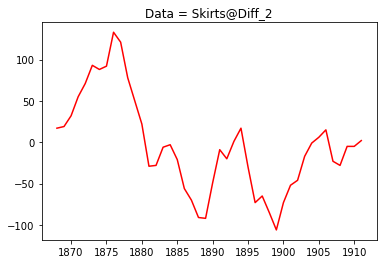

In [24]:
#Lineplot
plt.plot(skirts_diff2, 'r')
plt.title('Data = Skirts@Diff_2')


Text(0.5, 1.0, 'Histogram of Skirts@Diff_2')

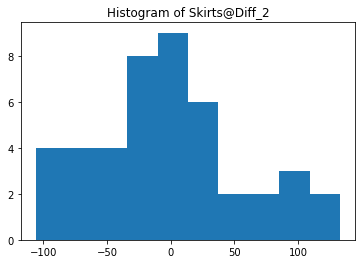

In [25]:
#Histogram
plt.hist(skirts_diff2)
plt.title('Histogram of Skirts@Diff_2')


Text(0.5, 1.0, 'Density plot of skirts Data')

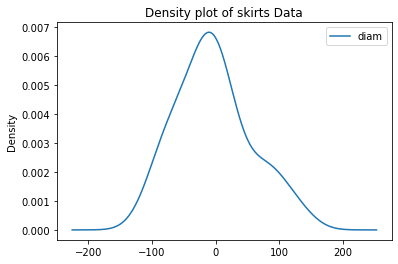

In [26]:
#Density plot
skirts_diff2.plot(kind='kde')
plt.title('Density plot of skirts Data')


year
1868-01-01    0.0
1869-01-01    0.0
1870-01-01    0.0
1871-01-01    0.0
1872-01-01    0.0
1873-01-01    0.0
1874-01-01    0.0
1875-01-01    0.0
1876-01-01    0.0
1877-01-01    0.0
1878-01-01    0.0
1879-01-01    0.0
1880-01-01    0.0
1881-01-01    0.0
1882-01-01    0.0
1883-01-01    0.0
1884-01-01    0.0
1885-01-01    0.0
1886-01-01    0.0
1887-01-01    0.0
1888-01-01    0.0
1889-01-01    0.0
1890-01-01    0.0
1891-01-01    0.0
1892-01-01    0.0
1893-01-01    0.0
1894-01-01    0.0
1895-01-01    0.0
1896-01-01    0.0
1897-01-01    0.0
1898-01-01    0.0
1899-01-01    0.0
1900-01-01    0.0
1901-01-01    0.0
1902-01-01    0.0
1903-01-01    0.0
1904-01-01    0.0
1905-01-01    0.0
1906-01-01    0.0
1907-01-01    0.0
1908-01-01    0.0
1909-01-01    0.0
1910-01-01    0.0
1911-01-01    0.0
Name: resid, dtype: float64

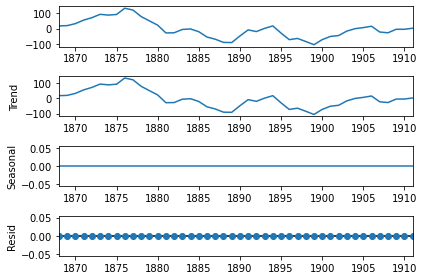

In [27]:
#Decompose with additive model
from statsmodels.tsa.seasonal import seasonal_decompose
skirts_diff2_decomp_a = seasonal_decompose(skirts_diff2, model='add')
skirts_diff2_decomp_a.plot() #No Trend & no seasonality
skirts_diff2_decomp_a.observed
skirts_diff2_decomp_a.trend
skirts_diff2_decomp_a.seasonal
skirts_diff2_decomp_a.resid

In [28]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
skirts_diff2_adf = adfuller(skirts_diff2)


In [29]:
print('ADF Statistic: %f' % skirts_diff2_adf[0])
print('p-value: %f' % skirts_diff2_adf[1])
print('Critical Values:')
for key, value in skirts_diff2_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.614915
p-value: 0.475396
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [30]:
#p-value: 0.475396 ie > 0.5, Null Hypothesis accepted, Data is not stationary
#H0: Data is not stationary

In [31]:
#Being trend and seasonality is not visible in the data using
#single exponential smoothing

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
skirts_ses = SimpleExpSmoothing(skirts).fit()
skirts_ses.summary()

C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,diam,No. Observations:,46
Model:,SimpleExpSmoothing,SSE,41869.930
Optimized:,True,AIC,317.429
Trend:,None,BIC,321.087
Seasonal:,None,AICC,318.405
Seasonal Periods:,None,Date:,"Sun, 05 Sep 2021"
Box-Cox:,False,Time:,19:44:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,608.00000,l.0,True


In [33]:
#Residual given by the model
skirts_ses_res = skirts_ses.resid
skirts_ses_res.head()


year
1866-01-01     0.000000
1867-01-01     9.000000
1868-01-01     8.045000
1869-01-01    11.040225
1870-01-01    21.055201
dtype: float64

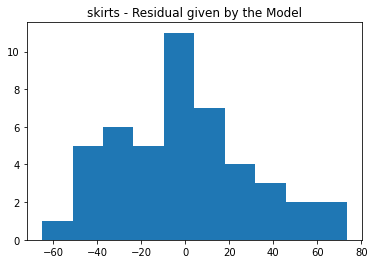

In [34]:
#Histogram of residuals
plt.hist(skirts_ses_res)
plt.title('skirts - Residual given by the Model')
plt.show()

In [35]:
!python -m pip install statsmodels 

Defaulting to user installation because normal site-packages is not writeable


In [42]:
from statsmodels.compat.pandas import deprecate_kwarg

import numpy as np
import pandas as pd

from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf

In [38]:
!pip install --upgrade --no-deps statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [59]:
#Plotting acf & pacf - residual
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


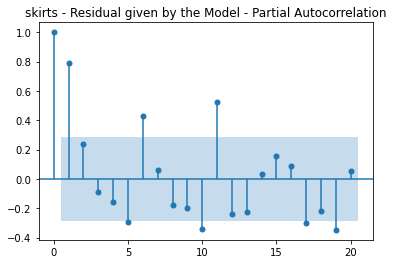

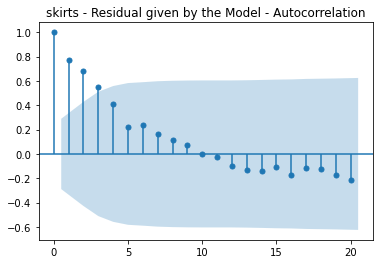

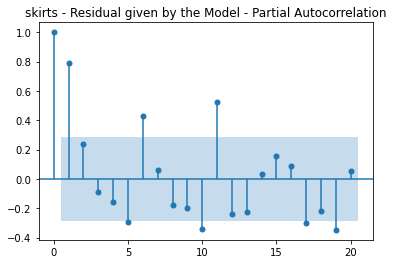

In [60]:
plot_acf(skirts_ses_res, lags=20, title='skirts - Residual given by the Model - Autocorrelation') 
plot_pacf(skirts_ses_res, lags=20, title='skirts - Residual given by the Model - Partial Autocorrelation')

In [44]:
#Squaring residuals/ errors
skirts_ses_se = pow(skirts_ses_res,2)
skirts_ses_se.head()


year
1866-01-01      0.000000
1867-01-01     81.000000
1868-01-01     64.722025
1869-01-01    121.886568
1870-01-01    443.321494
dtype: float64

In [45]:
#average/mean of squared residuals/ errors
skirts_ses_mse = (skirts_ses_se.sum())/len(skirts_ses_se)
print(skirts_ses_mse) #910.2158736656878


910.2158736656878


In [46]:
#Root of average/mean of squared residuals/ errors
skirts_ses_rmse = sqrt(skirts_ses_mse)
print(skirts_ses_rmse) #30.16978411698844


30.16978411698844


In [47]:
#Forecasting next 19 periods
skirts_pred = skirts_ses.forecast(steps=19)
print(skirts_pred)

1912-01-01    530.96015
1913-01-01    530.96015
1914-01-01    530.96015
1915-01-01    530.96015
1916-01-01    530.96015
1917-01-01    530.96015
1918-01-01    530.96015
1919-01-01    530.96015
1920-01-01    530.96015
1921-01-01    530.96015
1922-01-01    530.96015
1923-01-01    530.96015
1924-01-01    530.96015
1925-01-01    530.96015
1926-01-01    530.96015
1927-01-01    530.96015
1928-01-01    530.96015
1929-01-01    530.96015
1930-01-01    530.96015
Freq: AS-JAN, dtype: float64


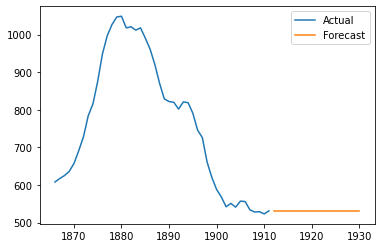

In [48]:
#Plot of actual and forecast
plt.plot(skirts)
plt.plot(skirts_pred)
plt.legend(['Actual', 'Forecast'])
plt.show()

In [49]:
#Applying autoarima
from pmdarima import auto_arima

skirts_aa = auto_arima(skirts)
skirts_aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -193.664
Date:                Sun, 05 Sep 2021   AIC                            391.329
Time:                        20:16:49   BIC                            394.897
Sample:                             0   HQIC                           392.652
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2997      0.152     -1.971      0.049      -0.598      -0.002
sigma2       388.7357    114.253      3.402      0.001     164.804     612.667
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.97   Prob(JB):                         0.41
Heteroskedasticity (H):               0.88   Skew:                            -0.14
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
#Residuals given by the mode
skirts_aa_res = skirts_aa.resid()
skirts_aa_res

array([ 608.        , -295.02600484,   -1.07580747,    2.70033466,
         10.89899602,   15.99665341,    6.89564944,   19.89899602,
        -18.30635851,   20.80803181,   21.39062956,  -21.10435056,
        -25.49163354,  -15.39397615,  -20.99665341,  -38.39397615,
         24.11104373,   -1.81137839,   11.4040159 ,  -28.50501988,
        -11.88895627,  -12.59933068,  -12.5959841 ,    5.30301193,
         37.39732273,   15.48828695,  -14.50167329,   32.20535454,
         -9.91238237,  -32.29297217,  -24.79129888,   19.9056892 ,
        -37.50836646,   10.51505964,   16.19196819,   14.69698807,
         -2.4040159 ,   33.20200795,   -8.51171305,   20.30635851,
         -9.20870112,  -26.0943108 ,    9.70702783,   11.79464546,
         -4.90234261,   11.90234261])

In [51]:
#Addings index to the residuals & converting into dataframe
skirts_aa_res = pd.DataFrame(skirts_aa_res, index=skirts.index)
skirts_aa_res

,0
year,
1866-01-01,608.000000
1867-01-01,-295.026005
1868-01-01,-1.075807
1869-01-01,2.700335
1870-01-01,10.898996
1871-01-01,15.996653
1872-01-01,6.895649
1873-01-01,19.898996
1874-01-01,-18.306359


In [52]:
#Calculating RMSE
skirts_aa_rmse = sqrt(mean_squared_error(skirts,skirts_aa_res))
print(skirts_aa_rmse) #782.2861317288002


782.2861317286374


Text(0.5, 1.0, 'Histogram of Skirts_residuals')

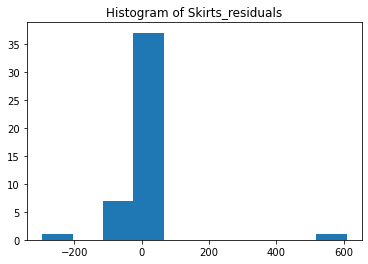

In [53]:
#Residuals plot
plt.hist(skirts_aa_res)
plt.title('Histogram of Skirts_residuals')

In [54]:
#Forecasting next 19 periods
skirts_aa_pred = skirts_aa.predict(n_periods=19)
skirts_aa_pred

array([534.80468522, 539.86656088, 544.55170013, 549.34973423,
       554.11393765, 558.88827896, 563.65958229, 568.431796  ,
       573.2037369 , 577.97575956, 582.74775771, 587.51976321,
       592.2917665 , 597.06377046, 601.83577421, 606.60777803,
       611.37978183, 616.15178563, 620.92378944])

In [55]:
#Adding date index to the forecasting values and converting arrays to dataframe
skirts_aa_pred = pd.DataFrame(skirts_aa_pred, 
                              index=pd.date_range(start='1912-01-01',
                                                  periods=19,freq='YS'))
skirts_aa_pred

,0
1912-01-01,534.804685
1913-01-01,539.866561
1914-01-01,544.551700
1915-01-01,549.349734
1916-01-01,554.113938
1917-01-01,558.888279
1918-01-01,563.659582
1919-01-01,568.431796
1920-01-01,573.203737
1921-01-01,577.975760


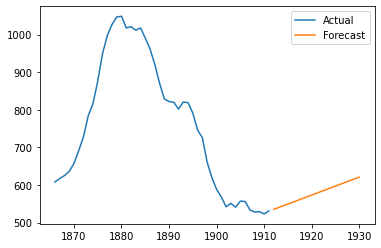

In [56]:
#Plot of actual and forecast
plt.plot(skirts)
plt.plot(skirts_aa_pred)
plt.legend(['Actual', 'Forecast'])
plt.show()
